### wine做PCA練習

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
x = wine.data
y = wine.target

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
X = pca.transform(x)

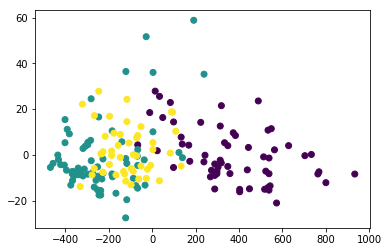

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=0)

In [12]:
from sklearn.svm import SVC

In [13]:
clf = SVC()

In [14]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_predict = clf.predict(x_test)

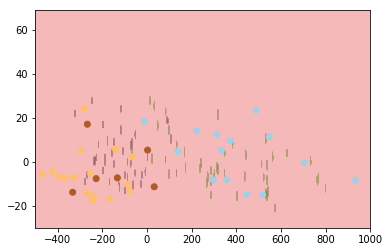

In [20]:
x0 = np.arange(-500,1000,1)
y0 = np.arange(-30,70,1)

xm,ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap='Paired')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')